# Statistics
This file contains code for analyzing different trials, and using the frequencies file to process them into a 
format that ANOVA and kin can handle.

[u'TP9', u'FP1', u'FP2', u'TP10', u'n/a', u'n/a']
[u'C:\\Users\\gsteelman\\Desktop\\Neurotech']
[[478880]]
[[220]]
type 	deltatime 	time
0 100 	11 	11
1 100 	0.118184694377 	11.1181846944
2 149 	96.2332033186 	107.351388013
3 12 	88.0189482407 	195.370336254
Chunk extracted
4 151 	57.4247037147 	252.795039968
5 12 	92.4315845442 	345.226624513
Chunk extracted
6 149 	60.4002277316 	405.626852244
7 12 	89.4562879447 	495.083140189
Chunk extracted
8 151 	62.17706736 	557.260207549
9 12 	87.8711118063 	645.131319355
Chunk extracted
10 149 	60.5032967101 	705.634616065
11 12 	89.5613764977 	795.195992563
Chunk extracted
12 151 	60.0053969401 	855.201389503
13 12 	89.7576747042 	944.959064207
Chunk extracted
14 149 	61.0692645657 	1006.02832877
15 12 	89.2522025051 	1095.28053128
Chunk extracted
16 151 	59.8456611071 	1155.12619239
17 12 	84.1515301589 	1239.27772254
Chunk extracted
18 149 	66.8299283265 	1306.10765087
19 12 	82.2995678659 	1388.40721874
Chunk extracted
20 151 	66.8352170746

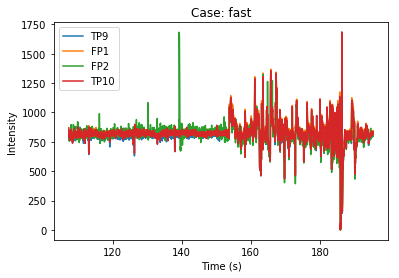

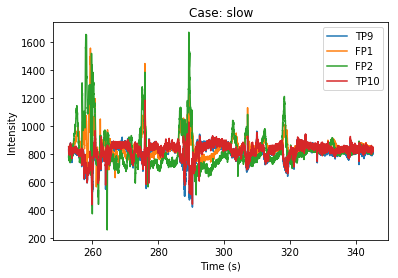

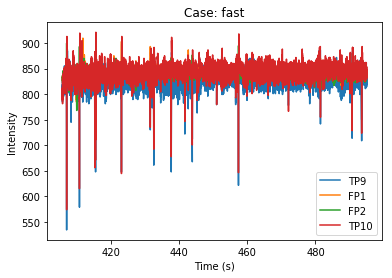

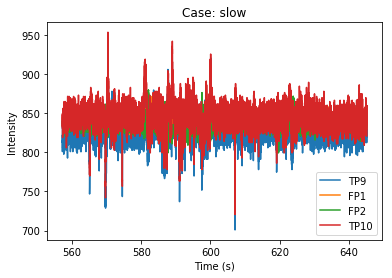

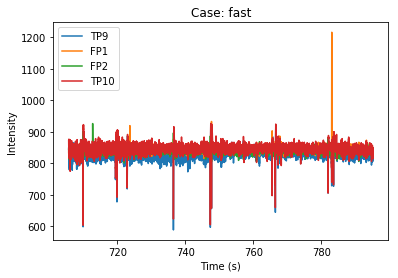

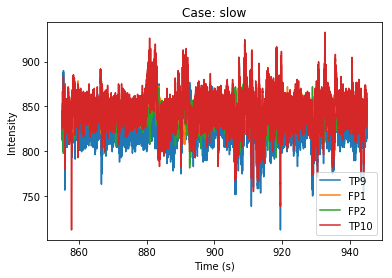

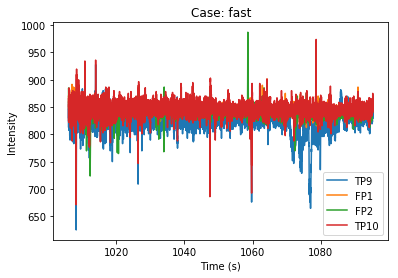

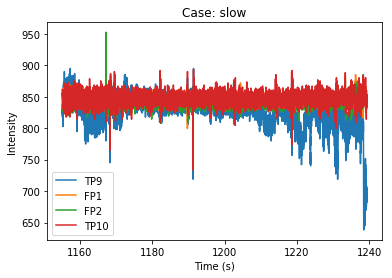

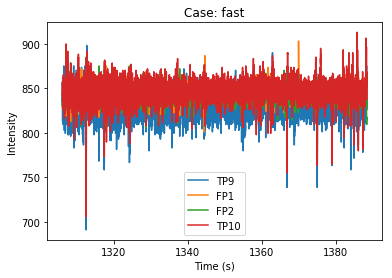

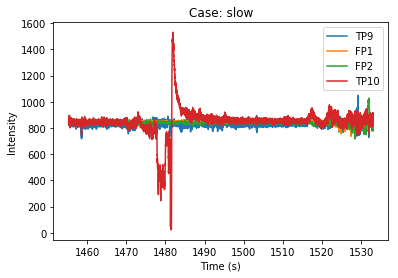

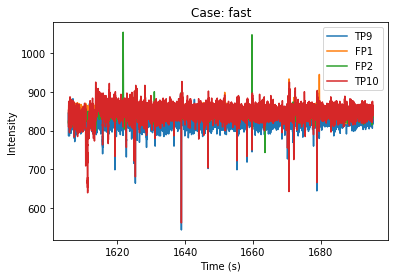

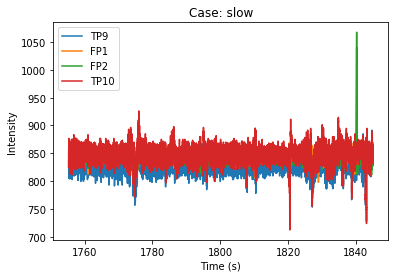

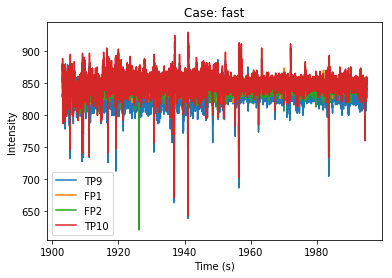

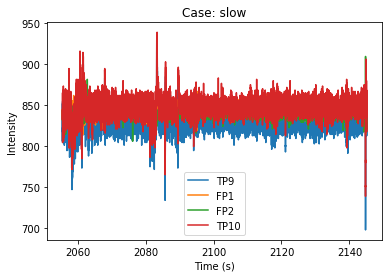

217


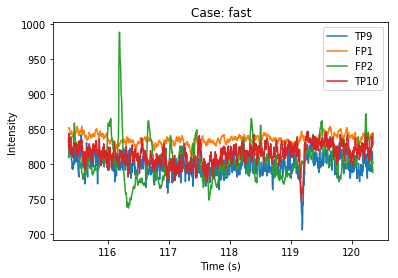

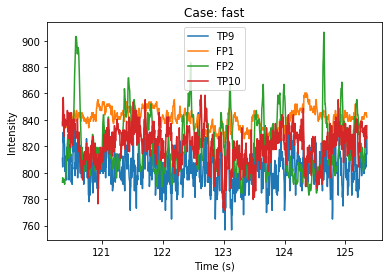

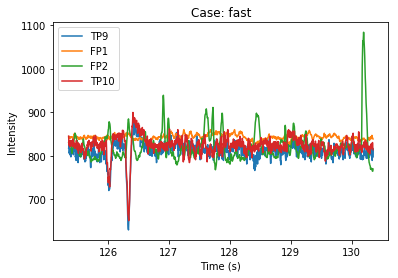

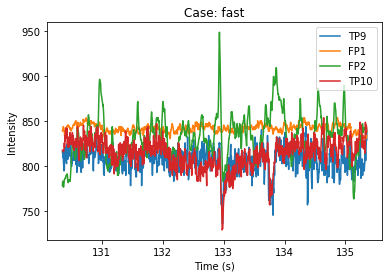

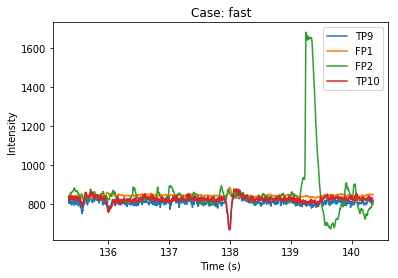

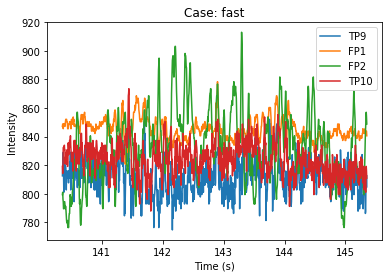

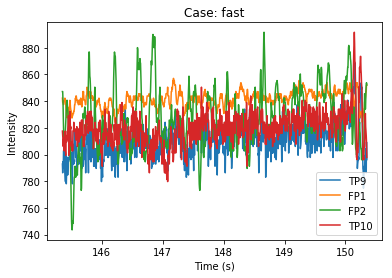

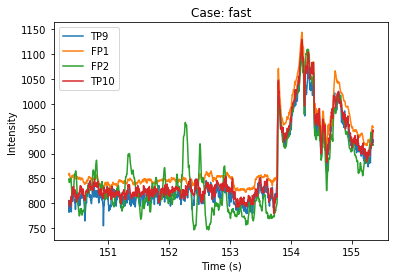

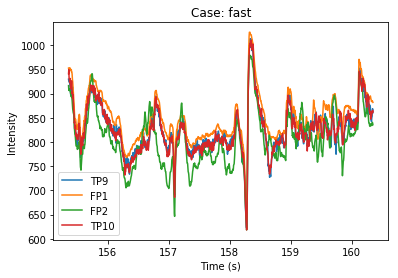

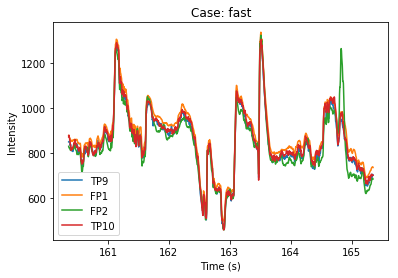

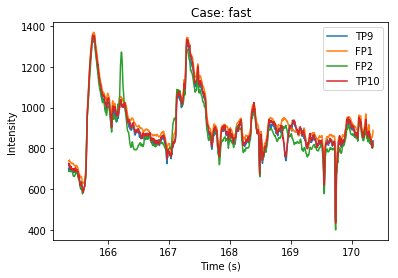

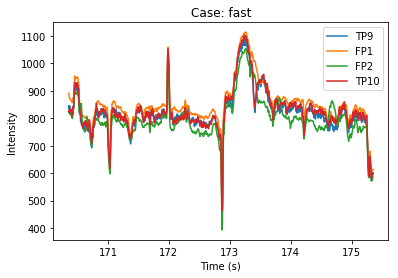

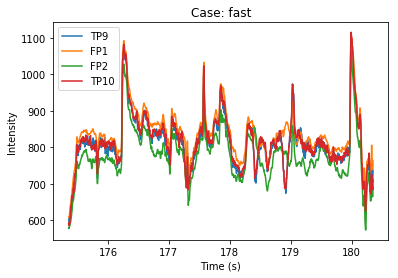

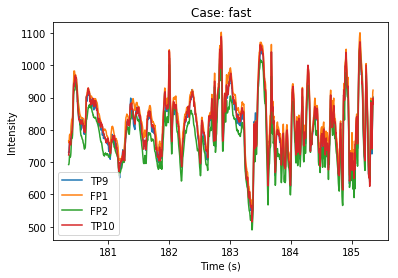

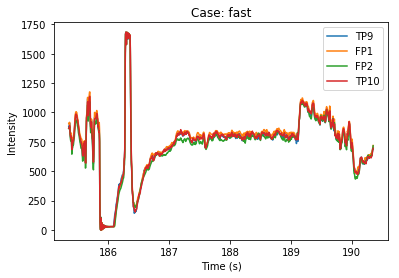

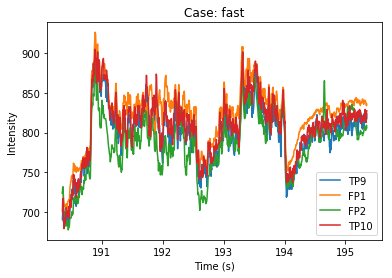

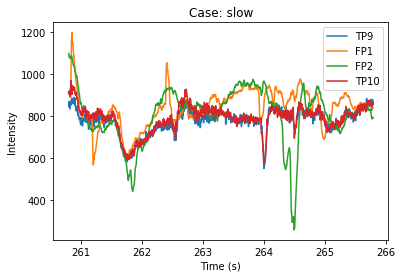

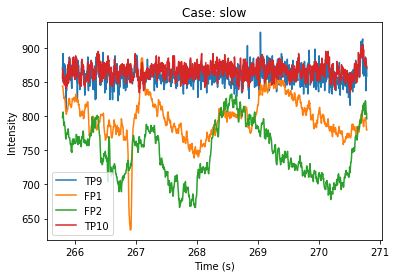

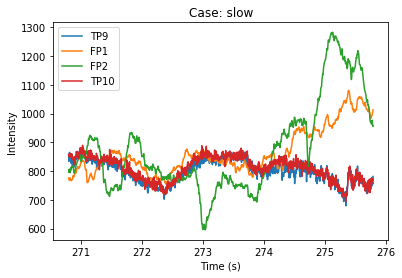

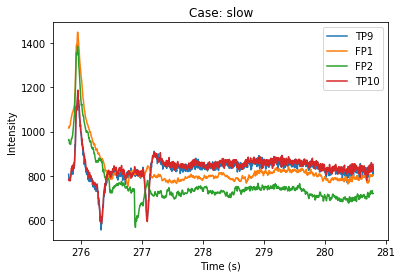

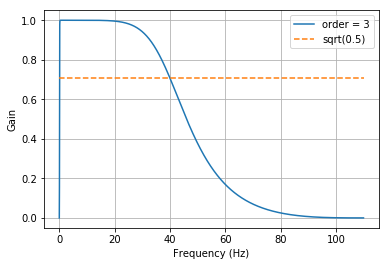

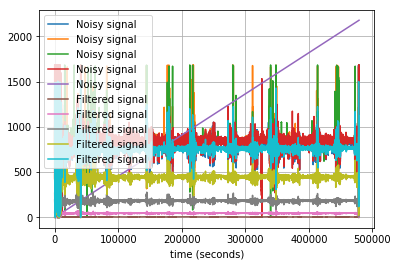

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


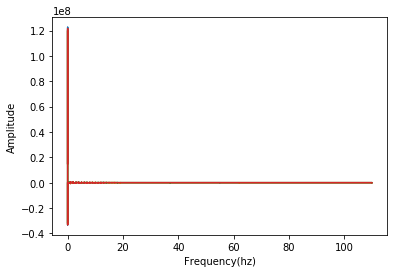

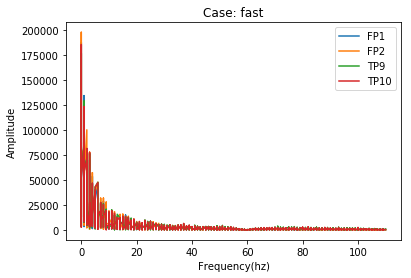

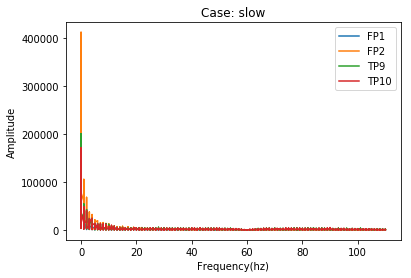

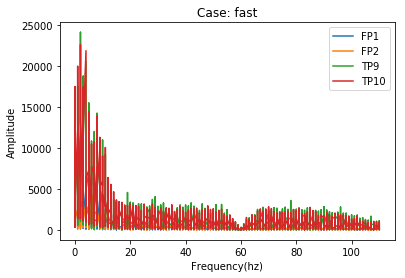

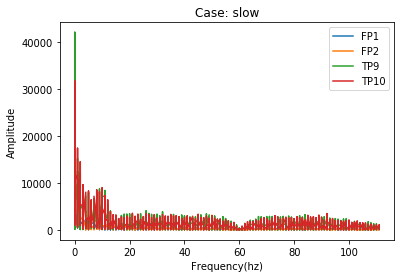

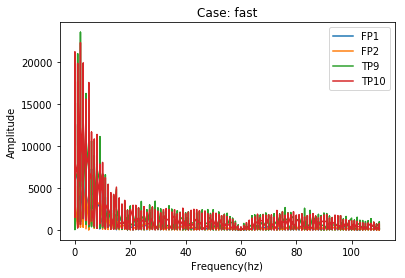

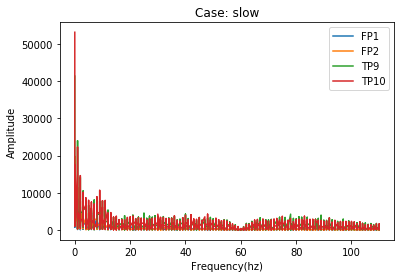

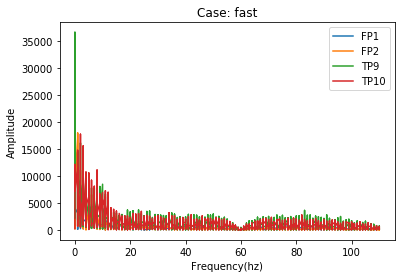

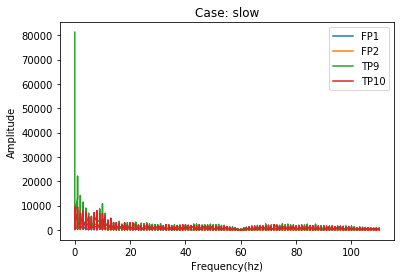

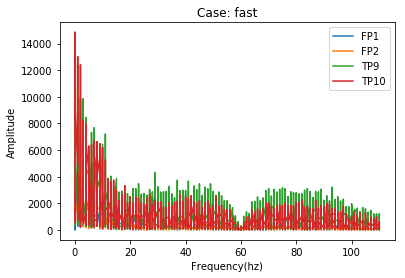

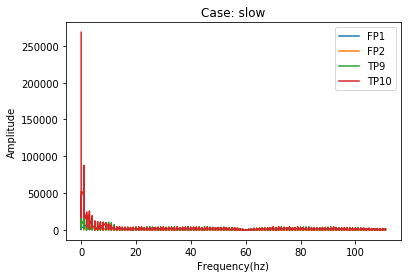

16


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats

%run 'frequencies.ipynb'

In [2]:
uchunks.head()

,case,end_time,start_time,duration,data,length,waveAmps
0,fast,120.351388,115.351388,5.0,TP9 FP1 FP2 ...,1100,"[8.00453048692, 3.62065606414, 5.67943366735, ..."
1,fast,125.351388,120.351388,5.0,TP9 FP1 FP2 ...,1100,"[10.1895373971, 4.89260245722, 7.28517660125, ..."
2,fast,130.351388,125.351388,5.0,TP9 FP1 FP2 ...,1100,"[10.1802344725, 5.35260956694, 5.56395547754, ..."
3,fast,135.351388,130.351388,5.0,TP9 FP1 FP2 ...,1100,"[6.48179991848, 2.36848885252, 1.70867184708, ..."
4,fast,140.351388,135.351388,5.0,TP9 FP1 FP2 ...,1100,"[9.61293674106, 2.64464311953, 2.88293898222, ..."


In [3]:
slow = np.array(uchunks[uchunks.case=='slow'].waveAmps.as_matrix().tolist())
fast = np.array(uchunks[uchunks.case=='fast'].waveAmps.as_matrix().tolist())
slow_allchan = pd.DataFrame(slow, columns=allFreqs)
fast_allchan = pd.DataFrame(fast, columns=allFreqs)
fast_allchan.head()

,FP1 beta,FP1 alpha,FP1 theta,FP1 delta,FP2 beta,FP2 alpha,FP2 theta,FP2 delta,TP9 beta,TP9 alpha,TP9 theta,TP9 delta,TP10 beta,TP10 alpha,TP10 theta,TP10 delta
0,8.004530,3.620656,5.679434,838.049706,53.961955,7.323064,7.599154,808.955258,15.140824,4.823859,5.566089,802.274553,14.100014,5.125326,8.845668,819.507617
1,10.189537,4.892602,7.285177,843.140405,41.664073,9.189241,7.520674,823.213105,13.245997,4.264746,5.004097,804.980383,14.348542,9.737375,8.282260,823.576012
2,10.180234,5.352610,5.563955,844.524024,59.316279,13.621718,8.603783,823.213970,34.873530,7.948914,10.475747,813.118111,36.272298,7.692683,6.027962,824.286482
3,6.481800,2.368489,1.708672,842.579384,42.644661,6.031785,11.063037,837.294471,18.325379,5.943396,4.625986,807.926832,19.355039,7.314400,14.034779,821.523306
4,9.612937,2.644643,2.882939,843.974103,383.427805,115.499730,101.963281,877.081998,36.374829,7.178072,4.176821,809.175943,38.470200,8.694408,6.402569,824.458511


In [4]:
def print_pvals(pvalues):
    print '\n'.join(["{}\t|  {:2.2f}".format(name, pval) for name, pval in zip(slow_allchan.columns, pvalues)])

In [5]:
pvalues = scipy.stats.ttest_ind(slow_allchan.as_matrix(), fast_allchan.as_matrix()).pvalue
print_pvals(pvalues)

FP1 beta	|  0.11
FP1 alpha	|  0.66
FP1 theta	|  0.70
FP1 delta	|  0.82
FP2 beta	|  0.05
FP2 alpha	|  0.67
FP2 theta	|  0.18
FP2 delta	|  0.60
TP9 beta	|  0.02
TP9 alpha	|  0.92
TP9 theta	|  0.44
TP9 delta	|  0.14
TP10 beta	|  0.19
TP10 alpha	|  0.26
TP10 theta	|  0.11
TP10 delta	|  0.07


In [20]:
def make_boxplot(i, ax=plt, title=True):
    if title:
        ax.set_title(slow_allchan.columns[i])
    plt.boxplot([slow[:,i],fast[:,i]]);
    plt.xticks([1,2], 'Slow Fast'.split())
    low, high = np.percentile(slow[:,i], [10,90])
    r = (high-low)*0.6
    plt.ylim([low-r, high+r]);
    pass

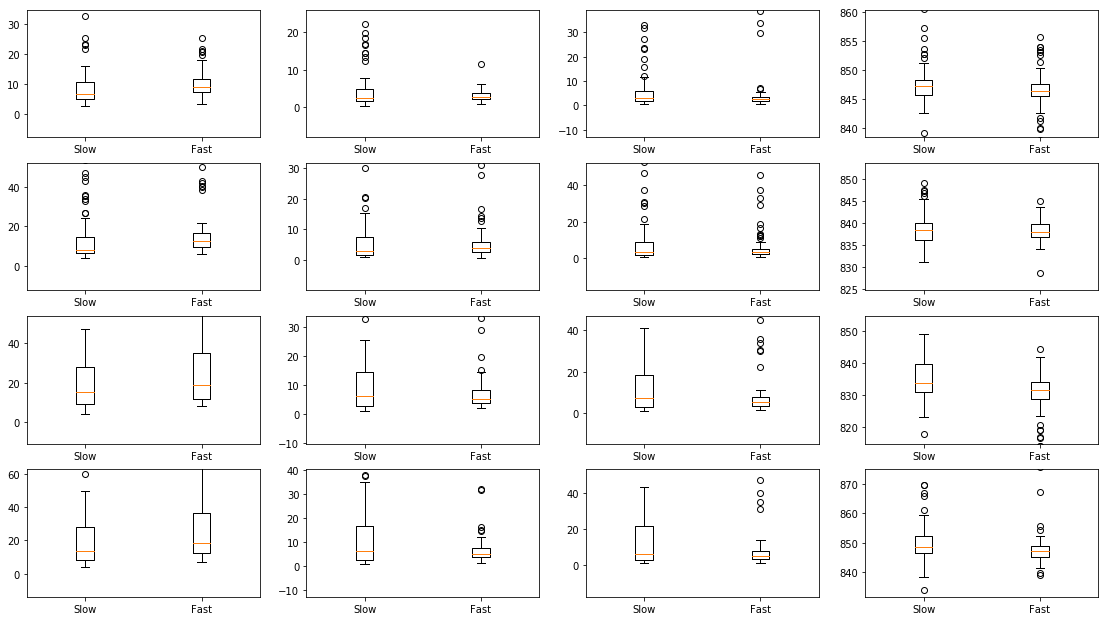

In [24]:
fig = plt.figure(figsize=np.array([16,9])*1.2)
for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    make_boxplot(i, ax, title=None)

fig.savefig('gridplot.png', dpi=300)